In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

"""
Step 1: Load and preprocess the data.
"""

# Load the data from a local .csv file to pandas DataFrame
data = pd.read_csv('./data.csv', sep = ";")
# Create a new feature - natural logarithm of period
data['ln_Period'] = np.log(data['Period'])

"""
Step 2: Select features for the model.
"""

# Create 3 possible subsets of features, for further comparison, and push them to a list 
X1 = data[['Max']]
X2 = data[['Min']]
X3 = data[['Max', 'Min']]

sets_of_features = [X1, X2, X3]

# Choose the target variable (as in the article)
y = data['ln_Period']

# For each candidate set of features...
for set_of_features in sets_of_features:
    
    # Split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(set_of_features, y, test_size = 0.4, random_state = 250)
    # Create and fit a linear regression on the train data
    partial_model = LinearRegression().fit(X_train, y_train)
    # Make predictions for test data
    partial_predictions = partial_model.predict(X_test)
    
    # Calculate R2 and RMSE 
    r2 = r2_score(y_test, partial_predictions)
    rmse = mean_squared_error(y_test, partial_predictions) ** 0.5
    
    # Print a small accuracy report
    features_list = list(set_of_features.columns)
    featues_string = str(features_list).strip('[]')
    print(str(len(features_list)) + " feature(s) used: " + featues_string + ". R2: " + str(round(r2,2)) + " , RMSE: " + str(round(rmse,2)))

1 feature(s) used: 'Max'. R2: 0.92 , RMSE: 0.29
1 feature(s) used: 'Min'. R2: 0.88 , RMSE: 0.35
2 feature(s) used: 'Max', 'Min'. R2: 0.9 , RMSE: 0.31


### Features selection decision
Based on the test above, the best set of features to use in the model is a set with just 1 feature: 'Max'.

On the next cell, I'm creating a model with this single feature, training it on a train part of a dataset, and visualize its predictions' accuracy for the test set.

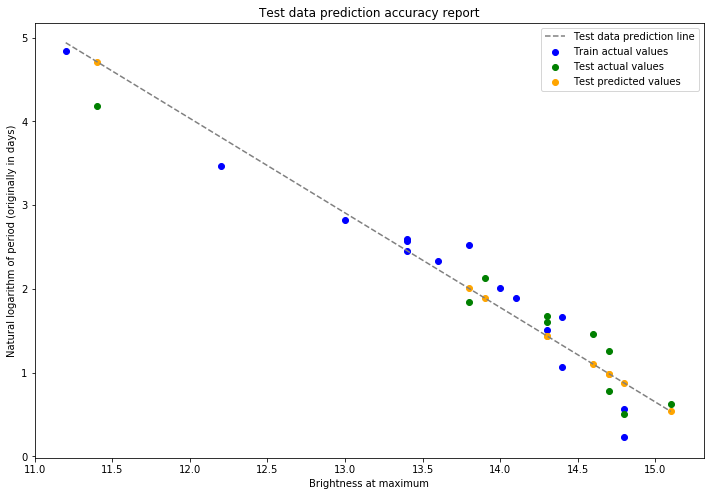

Prediction accuracy report (for test part of the split only). R2: 0.92 , RMSE: 0.29


In [77]:
"""
Step 3: For the selected set of features, perform a single train-test split, create and fit the model to train data,
make predictions for test data, and visualize the quality of predictions for this test data.
"""

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.4, random_state = 250)
# Create and fit a linear regression on the train data
partial_model = LinearRegression().fit(X_train, y_train)
# Make predictions for test data
partial_predictions = partial_model.predict(X_test)

# Plot the expected result against the real result using the test data
plt.figure(figsize=(12,8))
plt.scatter(X_train, y_train, color = 'blue', label = 'Train actual values')
plt.scatter(X_test, y_test, color = 'green', label = 'Test actual values')
plt.scatter(X_test, partial_predictions, color = 'orange', label = 'Test predicted values')
prediction_space = np.linspace(min(data['Max']), max(data['Max'])).reshape(-1,1)
plt.plot(prediction_space, partial_model.predict(prediction_space), color = 'grey',
         linestyle = 'dashed', label = 'Test data prediction line')
plt.legend()
plt.xlabel("Brightness at maximum")
plt.ylabel("Natural logarithm of period (originally in days)")
plt.title("Test data prediction accuracy report")
plt.show()

# Print a small accuracy report
rmse = mean_squared_error(y_test, partial_predictions) ** 0.5
r2 = r2_score(y_test, partial_predictions)
print("Prediction accuracy report (for test part of the split only). R2: " + str(round(r2,2)) + \
      " , RMSE: " + str(round(rmse,2)))

### Conclusion
In this assignment, I:
1. Loaded and preprocessed the data.
1. Performed features selection to choose the set which provides the highest test R2 (or lowest RMSE).
1. Constructed the model with optimal features.
1. Splitted the data into train and test parts, trained the model on train part, and predicted values for test part.
1. Visualized the quality of predictions.